In [2]:
%reset
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [14]:
# simple linear regression, simple dataset
x=pd.Series([1,1,1,2,2,3,3,4,4,5,5,5],name="X")
y=pd.Series([6.4,5.6,6.0,7.5,6.5,8.3,7.7,11.7,10.3,17.6,18.0,18.4],name="Y")

In [15]:
np.mean(x)

3.0

In [16]:
np.mean(y)

10.333333333333334

In [17]:
xA=x-np.mean(x)
yA=y-np.mean(y)

In [18]:
df=pd.concat([xA,yA],axis='columns')
df

X         Y
0  -2.0 -3.933333
1  -2.0 -4.733333
2  -2.0 -4.333333
3  -1.0 -2.833333
4  -1.0 -3.833333
5   0.0 -2.033333
6   0.0 -2.633333
7   1.0  1.366667
8   1.0 -0.033333
9   2.0  7.266667
10  2.0  7.666667
11  2.0  8.066667

In [19]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [20]:
model=ols('Y~X',data=df)
results=model.fit()
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.835   
Dependent Variable: Y                AIC:                52.6202 
Date:               2023-06-23 14:39 BIC:                53.5900 
No. Observations:   12               Log-Likelihood:     -24.310 
Df Model:           1                F-statistic:        56.58   
Df Residuals:       10               Prob (F-statistic): 2.01e-05
R-squared:          0.850            Scale:              4.0395  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept      -0.0000    0.5802  -0.0000  1.0000  -1.2928  1.2928
X               2.8571    0.3798   7.5222  0.0000   2.0108  3.7035
-----------------------------------------------------------------
Omnibus:               3.752        Durbin-Watson:          0.704
Prob(Omnibus):        

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [21]:
model1=ols('y~x',data=df)
results=model1.fit()
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.835   
Dependent Variable: y                AIC:                52.6202 
Date:               2023-06-23 14:39 BIC:                53.5900 
No. Observations:   12               Log-Likelihood:     -24.310 
Df Model:           1                F-statistic:        56.58   
Df Residuals:       10               Prob (F-statistic): 2.01e-05
R-squared:          0.850            Scale:              4.0395  
-------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
Intercept    1.7619     1.2787   1.3779   0.1983   -1.0872   4.6110
x            2.8571     0.3798   7.5222   0.0000    2.0108   3.7035
-----------------------------------------------------------------
Omnibus:               3.752        Durbin-Watson:          0.704
Prob(Omnibus):   

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [22]:
# scipy stats call
slope, intercept, _,_,_ = stats.linregress(x,y)
print(slope)
print(intercept)

2.857142857142857
1.7619047619047628


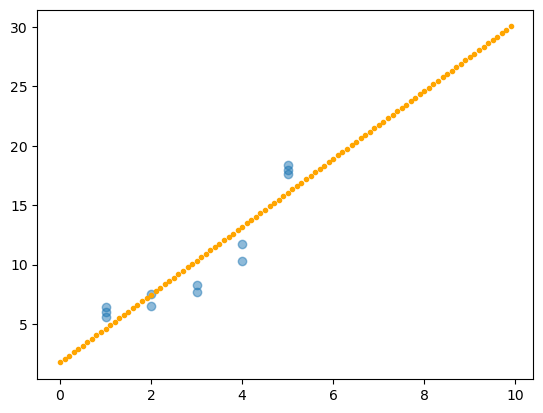

In [23]:
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(0,10,0.1)
plt.plot(grid,best_fit(grid), '.',color='orange')

<AxesSubplot:xlabel='X', ylabel='Y'>

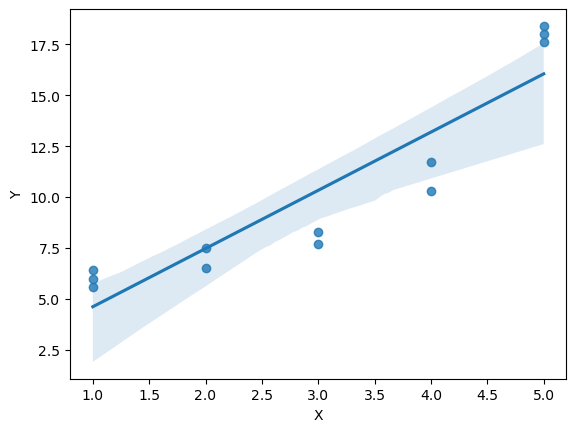

In [24]:
sns.regplot(x=x,y=y,data=df)

We have learned all about how to find the best fitting model for our data using the tool of Least Squares.  We have until now jumped to the minimization of the sum of squares and used those coefficients in our model.  There is another way of reducing the linear algebra equation, as a minimization of a cost function, in an iterative manner to find the minima and therfore the best fitted model.  These kinds of methods (Gradient Descent) can be less computationally diffciullt and is often used in machine learning and artifical intelligence.   

## Cost (loss) function  
The cost is the error in our predicted equation using of using **b** and **a**. Our goal is to minimize this error to obtain the most accurance value of **b** and **a**.  
We will use the Mean Squared Error function as the cost function to calculate the cost. There are three steps in this function:
1. Find the difference between the actual y and predicted y value (y = bx + a), for a given x.  
2. Square this difference.
3. Find the mean of the squares for every value in X.  
\\[ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar y_i)^2\\]  

Here $y_i$ is the actual value and $\bar y_i$ is the predicted value. Lets substitue the value of $\bar y_i$
\\[ E = \frac{1}{n} \sum_{i=0}^n (y_i - (bx_i + a))^2\\]

So we square the error and find the mean. hence the name Mean Squared Error.  

Most cost functions add a 2 to the denminator to make the MSE derivation calculus cleaner, so let's say he cost function is:

\\[ E = \frac{1}{2n} \sum_{i=0}^n (y_i - (bx_i + a))^2\\]

Now that we have defined the cost function, lets minimize it by iteratively finding **b** and **a**

## The Gradient Descent Algorithm  
Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Cost Function.  

From Wikipedia:  https://en.wikipedia.org/wiki/Gradient_descent "In mathematics, gradient descent (also often called steepest descent) is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. 

**Understanding Gradient Descent**  

In our module on Surface Response Methodologies, we have often used Mount Fuji as our surfcae that we are following, so we can continue thinking in terms of being dropped off from a helipcopter onto Mount Fuji...

From Wikipedia:  https://en.wikipedia.org/wiki/Gradient_descent "The basic intuition behind gradient descent can be illustrated by a hypothetical scenario. **A person is stuck in the mountains and is trying to get down**  (i.e., trying to find the global minimum). There is heavy fog such that visibility is extremely low. Therefore, the path down the mountain is not visible, so they must use local information to find the minimum. They can use the method of gradient descent, which involves looking at the steepness of the hill at their current position, **then proceeding in the direction with the steepest descent** (i.e., downhill). If they were trying to find the top of the mountain (i.e., the maximum), then they would proceed in the direction of steepest ascent (i.e., uphill). Using this method, they would eventually **find their way down the mountain** or possibly get stuck in some hole (i.e., local minimum or saddle point), like a mountain lake. However, assume also that the steepness of the hill is not immediately obvious with simple observation, but rather it requires a sophisticated instrument to measure, which the person happens to have at the moment. It takes quite some time to measure the steepness of the hill with the instrument, thus they should minimize their use of the instrument if they wanted to get down the mountain before sunset. The difficulty then is choosing the frequency at which they should measure the steepness of the hill so not to go off track.

In this analogy, the person represents the algorithm, and the path taken down the mountain represents the sequence of parameter settings that the algorithm will explore. The steepness of the hill represents the slope of the function at that point. The instrument used to measure steepness is differentiation. The direction they choose to travel in aligns with the gradient of the function at that point. The amount of time they travel before taking another measurement is the step size."

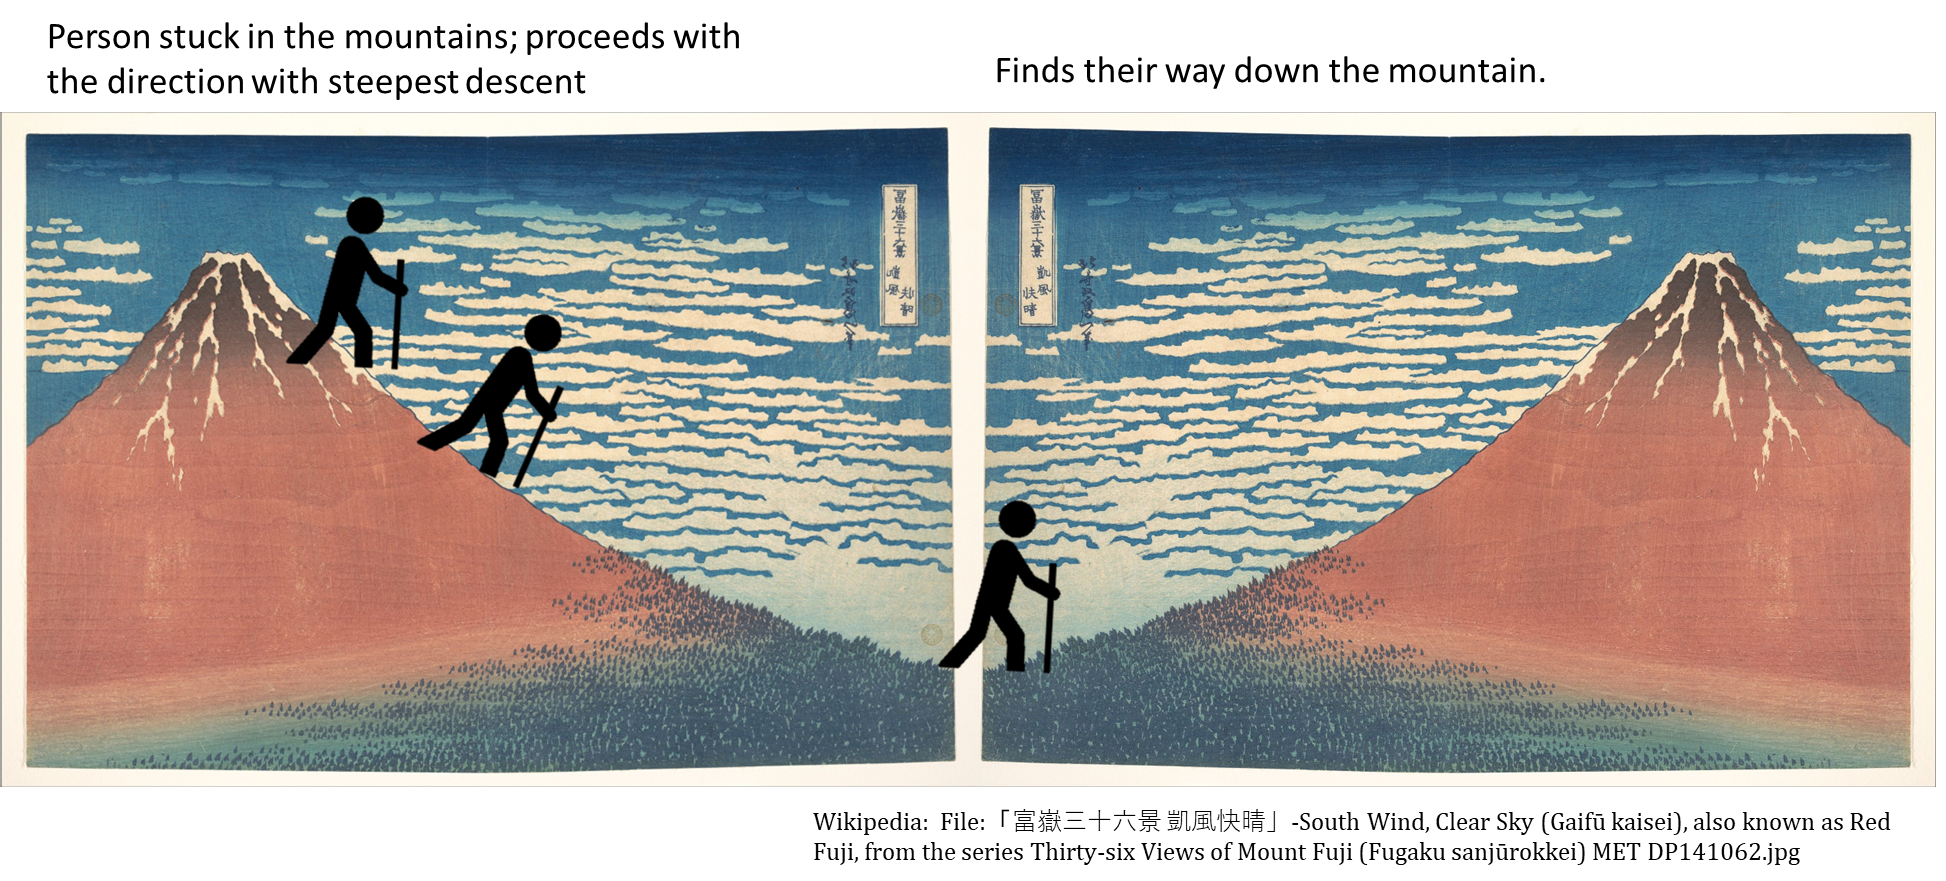

Let's try applying gradient descent to **b** and **a** , step by step: 
1. Initially let b = 0 and a = 0, or any other initial values. Let our learning rate=step size (sometimes called alpha rate). This controls how much the value of **b** changes with each step. Alpha could be a small value like 0.0001 for good accuracy but this could take many iterations; or could be a big value like 0.8 for a quick descent but this could bounce across the mountain and lead to poor minimization. 

2. Calculate the partial derivative of the loss function with respect to b, and plug in the current values of x, y, b and a in it to obtain the derivative value **D**.  
\\[ D_b = \frac{1}{n} \sum_{i=0}^n 2(y_i - (bx_i + a))(-x_i) \\]
\\[ D_b = \frac{2}{n} \sum_{i=0}^n x_i(\bar y_i-y_i) \\]  
$D_b$ is the value of the partial derivative with respect to **b**. Similarly lets find the partial derivative with respect to **a**, $D_a$ :  
\\[ D_a = \frac{2}{n} \sum_{i=0}^n (\bar y_i-y_i) \\]
3. Now we update the current value of **b** and **a** using the following equation, with L=step size: 
\\[ b = b - L \times D_m\\]  
\\[ a = a - L \times D_c\\]  
4. We repeat this process untill our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of **b** and **a** that we are left with now will be the optimum values.  

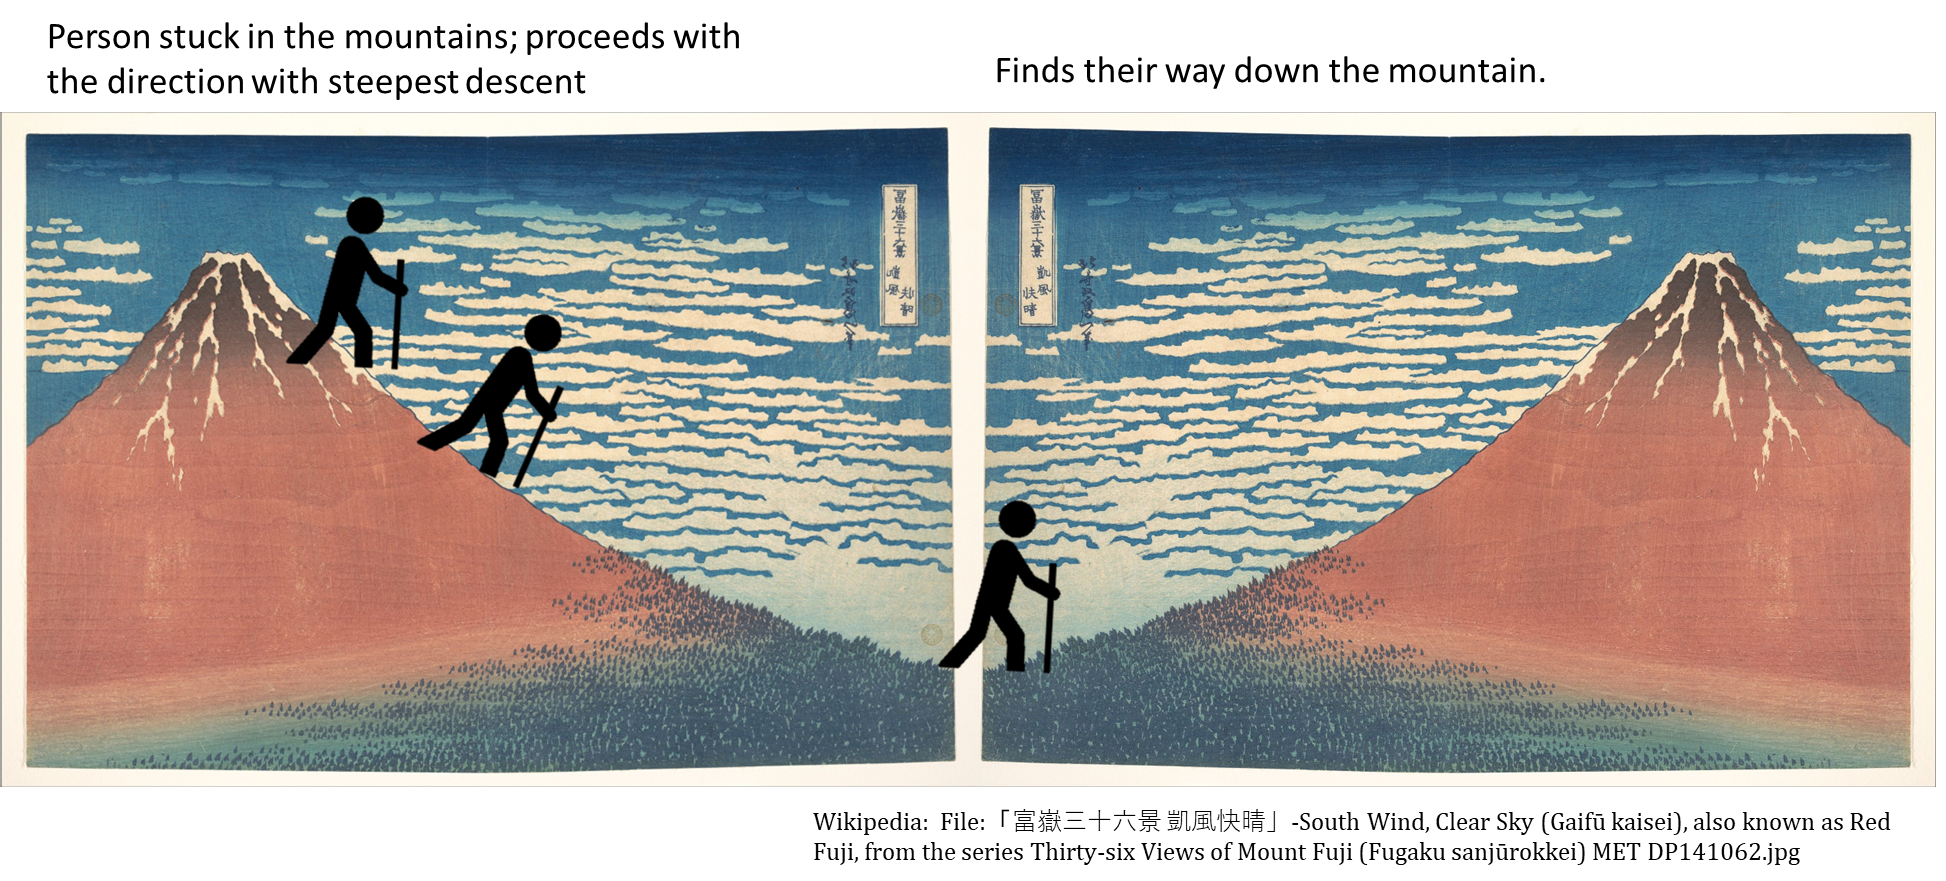

Now going back to our analogy, **b and a** can be considered the current position of the person. **D** is equivalent to the steepness of the slope and **L** can be the speed with which he moves. Now the new value of **b and a** that we calculate using the above equation will be his next positon, and $L \times D$ will be the size of the steps he will take. When the slope is more steep (**D** is more) he takes longer steps and when it is less steep (**D** is less), he takes smaller steps. Finally he arrives at the bottom of the valley which corresponds to our loss = 0.  

Let's try it:  choosing to set the initial theta values of b and a to [0,0] we can find the initial prediction of the regression line.  We will also add the column of 1's to the mean-centered x values to form the x-matrix. 

In [25]:
theta_i = [0, 0]
theta_i

[0, 0]

In [26]:
xaug = np.c_[np.ones(xA.shape[0]), xA]
xaug

array([[ 1., -2.],
       [ 1., -2.],
       [ 1., -2.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.]])

Now we wil find the predicted regression equation based on the initial theta values

We can use **matrix notation** or **linear equations** to find the prediction

$\hat{y}$ = **X**$\hat{\beta}$

Dot product (multiplication of matrix by another matrix) of rows x columns:  x design matrix is 12x2 and the beta matrix is 1x2 so the resulting dot product matrix is a 12x2 matrix

When we do multiplication:
- The number of columns of the 1st matrix must equal the number of rows of the 2nd matrix.
- And the result will have the same number of rows as the 1st matrix, and the same number of columns as the 2nd matrix.

Or $\hat{y}$ = a + bX

In [27]:
predEX = np.dot(xaug, theta_i)
predEX

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
predEXA = theta_i[0] - (xA*theta_i[1])
predEXA

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
Name: X, dtype: float64

Now we will find the residuals from this initial fitted line

Wikipedia (OLS):  "OLS estimation can be viewed as a projection onto the linear space spanned by the regressors. (Here each of X1 and X2 refers to a column of the data matrix.)"

y is the observed response and you predict this by the linear combination of the predictors which lie inside the column vector space for **X**.  The y vector is in the column vector space and the error term, which is minimized (perpendicular to this space: error= (y-**X**$\hat{\beta}$)

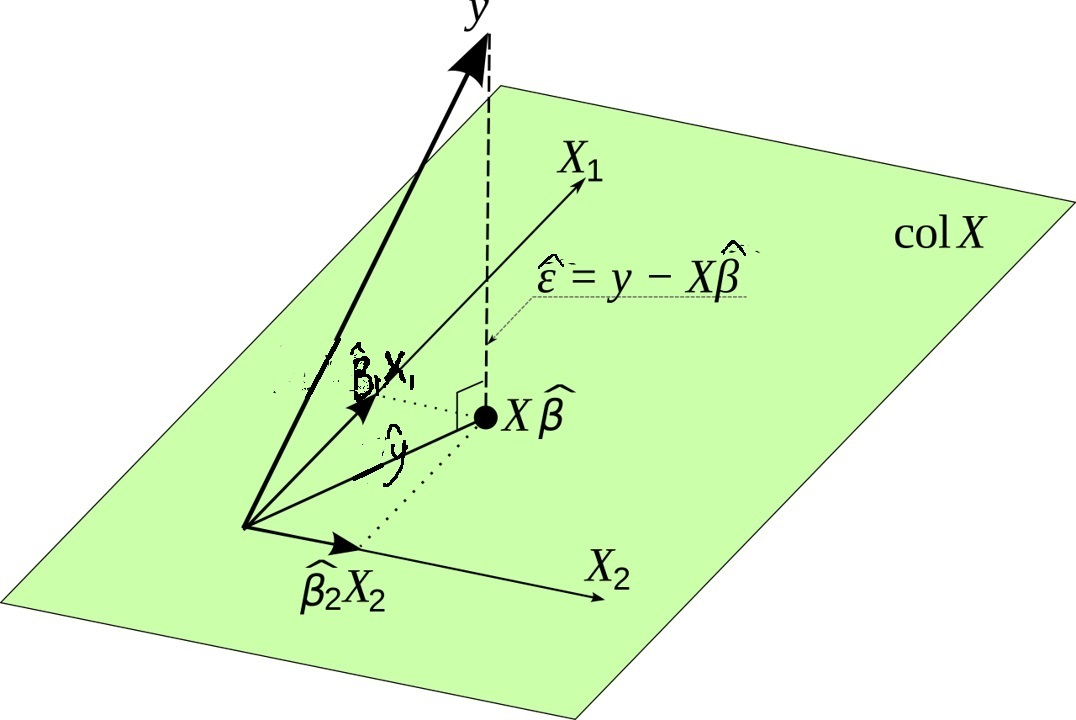

In [29]:
errorEXA=yA-np.dot(xaug, theta_i)
errorEXA

0    -3.933333
1    -4.733333
2    -4.333333
3    -2.833333
4    -3.833333
5    -2.033333
6    -2.633333
7     1.366667
8    -0.033333
9     7.266667
10    7.666667
11    8.066667
Name: Y, dtype: float64

In [30]:
errorEX = yA-predEX
errorEX

0    -3.933333
1    -4.733333
2    -4.333333
3    -2.833333
4    -3.833333
5    -2.033333
6    -2.633333
7     1.366667
8    -0.033333
9     7.266667
10    7.666667
11    8.066667
Name: Y, dtype: float64

Next, let's find the gradient for b, the partial derivative of the cost function w.r.t. b.  

**X<sup>T</sup>X** = sum of squares and sum of cross-products matrix

**X<sup>T</sup>e** = sum of **X** times **error** 

In [124]:
# note (negative for the 2 here since yi - yhat))
gradientEX = ((xaug.T.dot(errorEXA))*-2)/(yA.size)
gradientEX

array([ 2.96059473e-16, -1.33333333e+01])

In [125]:
# the partial deriivative of the cost function w.r.t. a
(np.sum(errorEX)*-2)/(yA.size)

1.4802973661668755e-15

In [126]:
# the partial deriivative of the cost function w.r.t. b
xaugEX=xaug[:,1]
((np.sum(errorEX*xaugEX))*-2)/(yA.size)

-13.33333333333333

Now we take a gradient step, and will update the theta (beta or b and a) coefficients.  We have to specify the step size (learning rate).  The new theta values provide the new, updated cost function that we will work with for the next iteration in the process to find the minimization.  

In [127]:
theta_i

[0, 0]

In [128]:
#updated theta
theta=theta_i
step=.01
thetaEX = theta - (step * gradientEX) 
thetaEX

array([-2.96059473e-18,  1.33333333e-01])

In [129]:
#updated cost function
cost=np.sum(errorEX ** 2) / (2 * yA.size)
cost

11.206944444444444

Let's create a gradient descent def of a function to do this iterative process

In [130]:
xaug = np.c_[np.ones(xA.shape[0]), xA]
xaug

array([[ 1., -2.],
       [ 1., -2.],
       [ 1., -2.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.]])

In [131]:
theta_i = [0, 0]
theta_i

[0, 0]

In [132]:
def gradient_descent(x, y, theta_init, step_init, maxsteps=1000, precision=0.000001):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    step=step_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)    # initial prediction using the initial theta value also yhat = a+bx with initial thetas
    error = y - pred    # initial error = pred - y = error for the initial prediction
    currentcost = np.sum(error ** 2) / (2 * m)    # initial cost function (trying to minimize the sum of squares)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1

    while abs(currentcost - oldcost) >= precision: # while the difference between the current cost and the previous cost is greater than the specified value
        oldcost=currentcost
        gradient = (x.T.dot(error)*-2)/m   # the 1st derivative of the cost function; the gradient
        theta = theta - step * gradient  #  the descent gradient or update function; theta - alpha (the step size or learning rate) times the gradient
        history.append(theta)
        
        pred = np.dot(x, theta) # update the prediction at the new theta
        error = y-pred # update the error
        currentcost = np.sum(error ** 2) / (2 * m) # update the cost function
        costs.append(currentcost)
            
        preds.append(pred) 
        counter+=1
        if counter == maxsteps:  # if the counter is at the max for the steps, then break from the loop
            break
        
    return history, costs, preds, counter

In [133]:
step_i=0.1
history, costs, preds, counter = gradient_descent(xaug, yA, theta_i, step_i)
theta = history[-1]
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], counter))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))

Gradient Descent: -0.00, 2.86 15
Least Squares: 1.76, 2.86


We can try a step increase (learning rate) of 0.4 to see a step size that may be too high and 0.001 for a step size that may be too small.  

In [134]:
history[:5] # the history of theta; first 5 or last 5 of list

[[0, 0],
 array([-2.96059473e-17,  1.33333333e+00]),
 array([-1.18423789e-16,  2.04444444e+00]),
 array([-2.22044605e-16,  2.42370370e+00]),
 array([-3.40468394e-16,  2.62597531e+00])]

In [135]:
costs[:5]

[11.206944444444444,
 4.392129629629629,
 2.453693415637859,
 1.9023160036579785,
 1.745479762028145]

In [136]:
costs[-5:]

[1.6831679412576788,
 1.683144313167616,
 1.6831375922886647,
 1.6831356805719861,
 1.683135136794797]

In [137]:
preds[:5]

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-2.66666667e+00, -2.66666667e+00, -2.66666667e+00, -1.33333333e+00,
        -1.33333333e+00, -2.96059473e-17, -2.96059473e-17,  1.33333333e+00,
         1.33333333e+00,  2.66666667e+00,  2.66666667e+00,  2.66666667e+00]),
 array([-4.08888889e+00, -4.08888889e+00, -4.08888889e+00, -2.04444444e+00,
        -2.04444444e+00, -1.18423789e-16, -1.18423789e-16,  2.04444444e+00,
         2.04444444e+00,  4.08888889e+00,  4.08888889e+00,  4.08888889e+00]),
 array([-4.84740741e+00, -4.84740741e+00, -4.84740741e+00, -2.42370370e+00,
        -2.42370370e+00, -2.22044605e-16, -2.22044605e-16,  2.42370370e+00,
         2.42370370e+00,  4.84740741e+00,  4.84740741e+00,  4.84740741e+00]),
 array([-5.25195062e+00, -5.25195062e+00, -5.25195062e+00, -2.62597531e+00,
        -2.62597531e+00, -3.40468394e-16, -3.40468394e-16,  2.62597531e+00,
         2.62597531e+00,  5.25195062e+00,  5.25195062e+00,  5.25195062e+00])]

In [138]:
counter

15

We can visualize the gradient descent using the updated theta coefficents and these effect on the cost function minimization.  

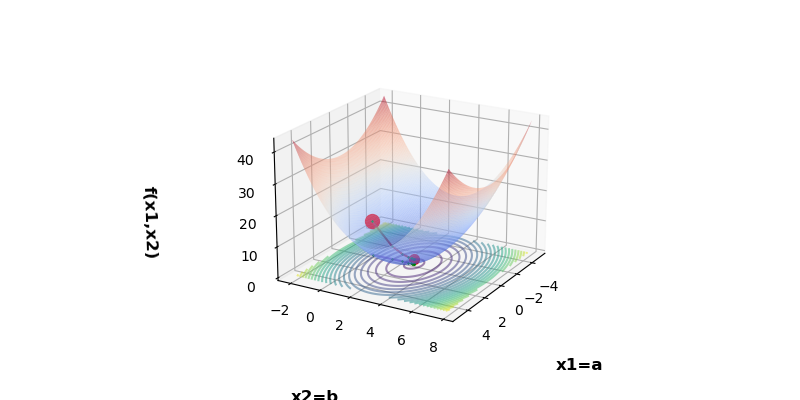

In [139]:
##### from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

def error(xA, yA, THETA):
    return np.sum((xA.dot(THETA) - yA)**2)/(2*yA.size)

ms = np.linspace(theta[0] - 5 , theta[0] + 5,100)
bs = np.linspace(theta[1] - 5 , theta[1] + 5,100)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, yA, theta) 
               
for theta in zip(np.ravel(M), np.ravel(B))])

Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(8,4))
#fig=plt.margins(x=0, y=0)
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, cmap='coolwarm', alpha=0.5)
ax.contour(M, B, Z, 20, alpha=0.5, offset=0, stride=30)


ax.set_xlabel('x1=a', labelpad=30, fontsize=12, fontweight='bold')
ax.set_ylabel('x2=b', labelpad=30, fontsize=12, fontweight='bold')
ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=12, fontweight='bold')
ax.view_init(elev=20., azim=30)

ax.plot([theta[0]], [theta[1]], [costs[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([history[0][0]], [history[0][1]], [costs[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10)

ax.plot([t[0] for t in history], [t[1] for t in history], costs , markerfacecolor='g', markeredgecolor='g', marker='x', markersize=1)
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='g', markeredgecolor='g', marker='x', markersize=1)


We can also visualize the effects of the step size (learning rate) on the cost function descent.  You want to have a good descent of the cost function at a good learning rate (too high and you miss information, too low and you have to have too many iterations). 

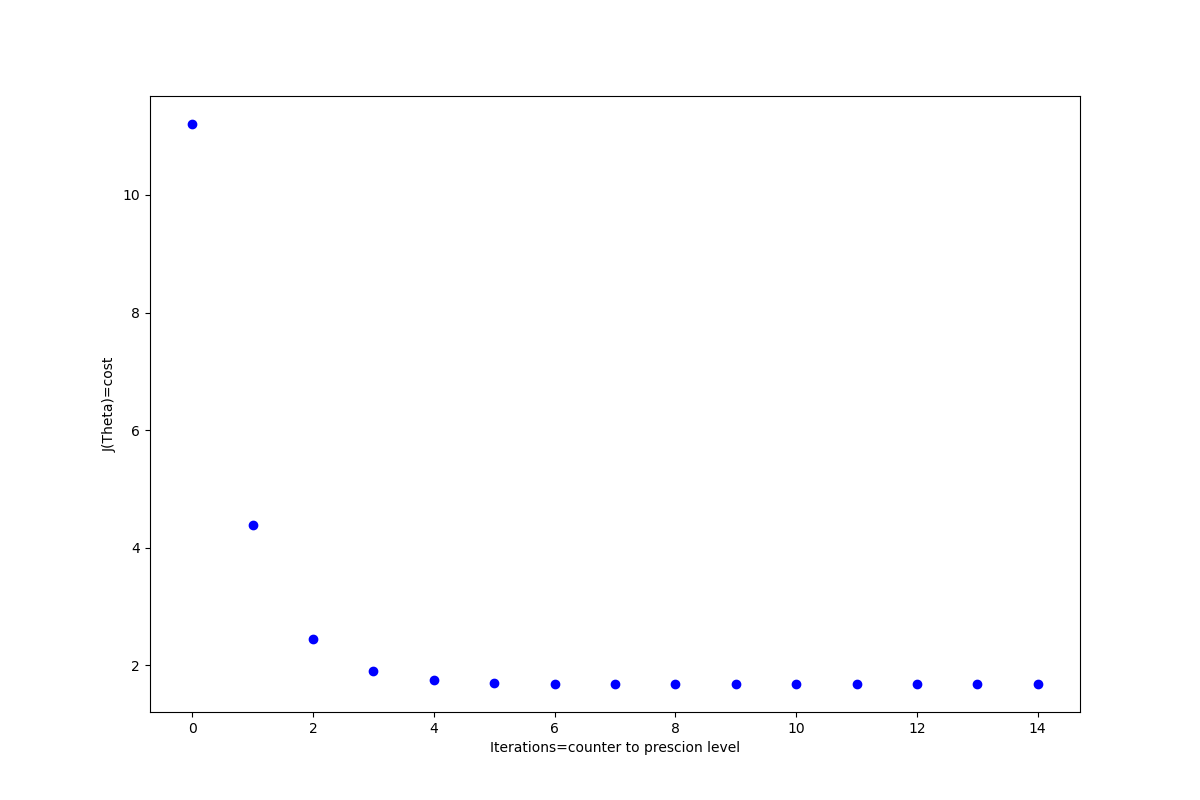

In [140]:
fig,ax = plt.subplots(figsize=(12,8))

n_iter=counter
ax.set_ylabel('J(Theta)=cost')
ax.set_xlabel('Iterations=counter to prescion level')
ax.plot(range(n_iter),costs,'bo')

You can visualize the fitting of the best fit line to see this as well.  Starting with theta = [0,0] gives a horizontal line that then iteratively begins to fit the data. 

<AxesSubplot:xlabel='X', ylabel='Y'>

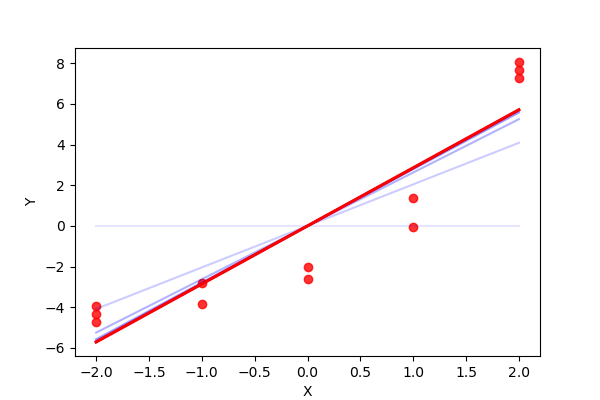

In [145]:
fig,ax = plt.subplots(figsize=(6,4))

tr =0.1 # starting value for decreasing transparency counter for visualization
n_iter=counter
for i in range(n_iter):
    a=history[i][0]
    b=history[i][1]
    predA = a+b*xA
    if ((i % 2 == 0) ): # plot when the remainder of 1/value is 0, so plot every <value> time
        plt.plot(xA,predA,'b-',alpha=tr)
        if tr < 0.9:
             tr = tr+0.1
sns.regplot(x=xA,y=yA,color='r',ci=False)